### House Prices: Advanced Regression Techniques
#### Kaggle Competition | Zoe Zirlin | zoe.zirlin@uga.edu

#### Narrowing down 79 variables to predict house prices (response variable) in Ames, Iowa.

- http://jse.amstat.org/v19n3/decock.pdf
- https://www.kaggle.com/c/house-prices-advanced-regression-techniques

___________________

#### Importing Libraries

In [2]:
import numpy as np #important numpy
import pandas as pd #importing pandas
import seaborn as sns #importing seaborn
import scipy.stats as stats
from scipy.stats import pearsonr #importing pearson correlation abilities
from matplotlib import pyplot as plt #importing pyplot
import statsmodels.api as sm #importing statsmodels
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.preprocessing import power_transform
from statsmodels.formula.api import ols

#### Importing Data

In [3]:
train = pd.read_csv("/Users/zoezirlin/Desktop/house-prices-advanced-regression-techniques/train.csv")
train[:3]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
test = pd.read_csv("/Users/zoezirlin/Desktop/house-prices-advanced-regression-techniques/test.csv")
test[:3]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


___________________

#### Identifying largely absent columns

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Eliminating largely absent columns

In [6]:
train = train.drop(columns = ['Alley', 'MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu'])

#### Removing observations with NaN in preperation for regression analysis
- We now have 76 columns and 1,094 rows

In [34]:
train = train.dropna()
train[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500


___________________

### Continuous variable preliminary analysis

#### Attaining descriptive statistics for numerical predictor variables

In [8]:
train_description = train.describe()
train_description

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,...,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,727.375686,56.128885,70.759598,10132.346435,6.247715,5.575868,1972.412249,1985.915905,109.855576,448.191956,...,94.341865,46.946984,22.053016,3.266910,16.498172,3.007313,23.550274,6.335466,2007.786106,187033.263254
std,420.955488,41.976345,24.508859,8212.249621,1.366797,1.066500,31.189752,20.930772,190.667459,468.728095,...,122.624615,64.820019,61.570502,29.655973,58.455303,40.713175,167.135237,2.694558,1.334307,83165.332151
min,1.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,366.500000,20.000000,60.000000,7606.750000,5.000000,5.000000,1953.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,132500.000000
50%,723.500000,50.000000,70.000000,9444.500000,6.000000,5.000000,1975.000000,1995.000000,0.000000,384.500000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165750.000000
75%,1093.750000,70.000000,80.000000,11387.250000,7.000000,6.000000,2003.000000,2005.000000,171.750000,712.750000,...,169.750000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,221000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,755000.000000


#### Visualization of potentially significant covariates

Matrix of plots describing sales price in terms of possibly significant predictor variables.


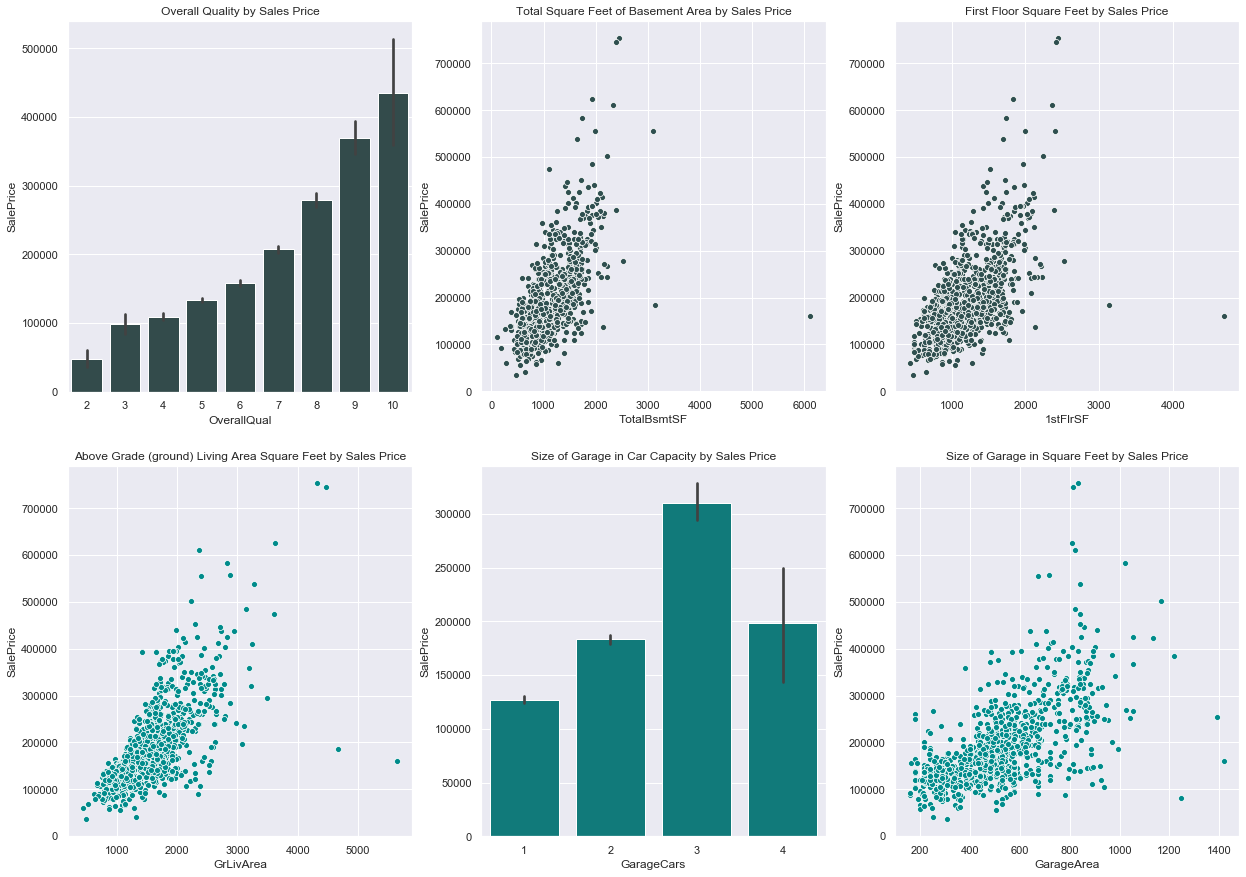

In [72]:
fig = plt.figure(figsize=(21,15))
sns.set(font_scale=1)

#1
plt.subplot2grid((2,3), (0,0))
sns.barplot(x="OverallQual", 
                      y="SalePrice", data=train, color='darkslategrey')
plt.title("Overall Quality by Sales Price")

#2
plt.subplot2grid((2,3), (0,1))
sns.scatterplot(x="TotalBsmtSF", 
                      y="SalePrice", data=train, color= 'darkslategrey')
plt.title("Total Square Feet of Basement Area by Sales Price")

#3
plt.subplot2grid((2,3), (0,2))
sns.scatterplot(x="1stFlrSF", 
                      y="SalePrice", data=train, color = 'darkslategrey')
plt.title("First Floor Square Feet by Sales Price")

#4
plt.subplot2grid((2,3), (1,0))
sns.scatterplot(x="GrLivArea", 
                      y="SalePrice", data=train, color = 'darkcyan')
plt.title("Above Grade (ground) Living Area Square Feet by Sales Price")

#5
plt.subplot2grid((2,3), (1,1))
sns.barplot(x="GarageCars", 
                      y="SalePrice", data=train, color='darkcyan')
plt.title("Size of Garage in Car Capacity by Sales Price")

#6
plt.subplot2grid((2,3), (1,2))
sns.scatterplot(x="GarageArea", 
                      y="SalePrice", data=train, color='darkcyan')
plt.title("Size of Garage in Square Feet by Sales Price")

print("Matrix of plots describing sales price in terms of possibly significant predictor variables.")

Text(0.5, 1.0, 'Lot Shape by Sales Price')

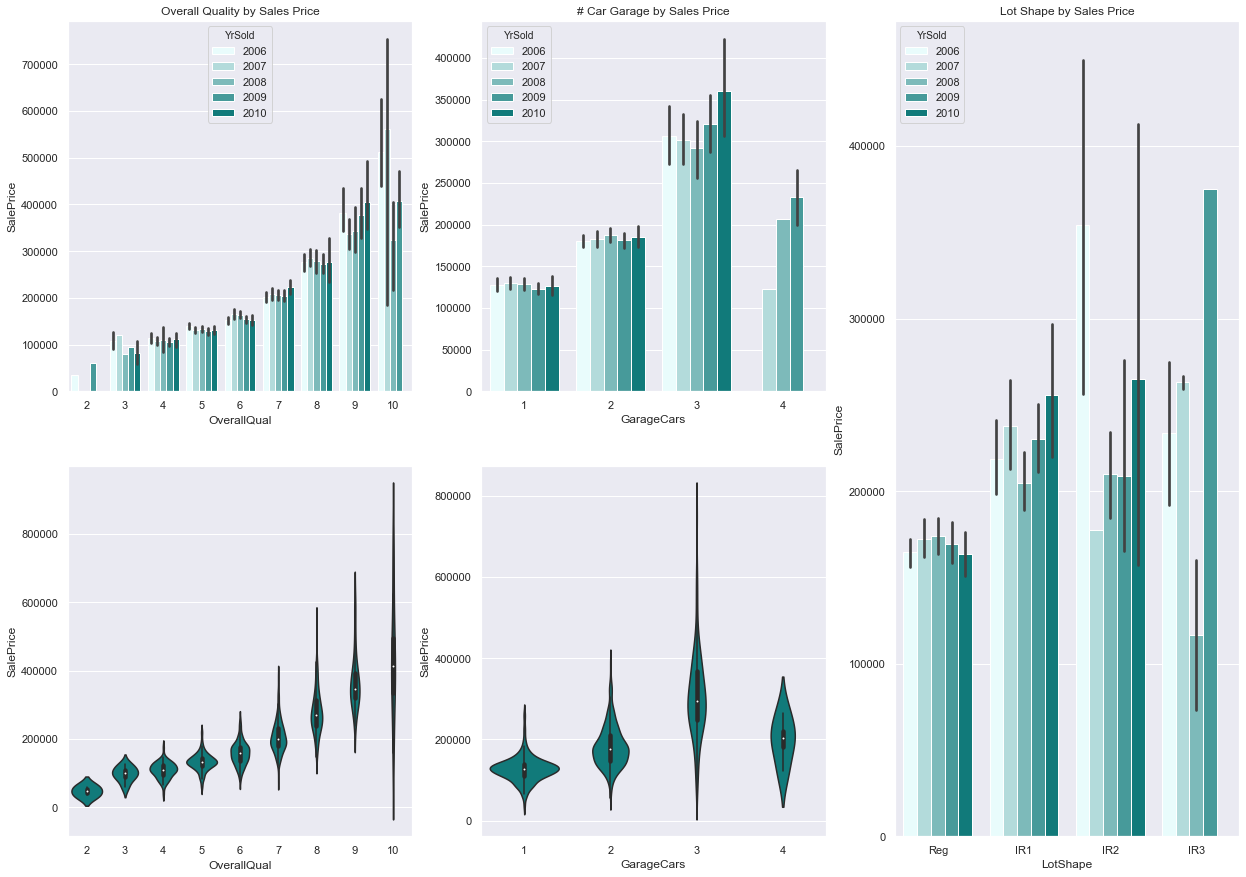

In [71]:
fig = plt.figure(figsize=(21,15))
sns.set(font_scale=1)

#1
plt.subplot2grid((2,3), (0,0))
sns.barplot(x="OverallQual", 
                      y="SalePrice", data=train, color='darkcyan', hue = 'YrSold')
plt.title("Overall Quality by Sales Price")

#4
plt.subplot2grid((2,3), (1,0))
sns.violinplot(x='OverallQual', y='SalePrice', data=train, color = 'darkcyan')


#2
plt.subplot2grid((2,3), (0,1))
sns.barplot(x="GarageCars", 
                      y="SalePrice", data=train, color='darkcyan', hue = 'YrSold')
plt.title("# Car Garage by Sales Price")

#5
plt.subplot2grid((2,3), (1,1))
sns.violinplot(x='GarageCars', y='SalePrice', data=train, color = 'darkcyan')


#3/#6

plt.subplot2grid((1,3), (0,2))
sns.barplot(x="LotShape", 
                      y="SalePrice", data=train, color='darkcyan', hue = 'YrSold')
plt.title("Lot Shape by Sales Price")

#### Pearson correlation coefficients for covariates that are associated with sales price

In [25]:
cont_corr_table = train.corr(method='pearson')
sales_corr = pd.DataFrame(cont_corr_table['SalePrice'])
sales_corr = sales_corr.sort_values(by = 'SalePrice', ascending=False)
print("Overall quality and sales price have a correlation coefficient of .8, indicating a strong linear relationship between the two.")
print("Living area and sales price have a correlation coefficient of .7, indicating a strong linear relationship between the two.")
print("While garage area and garage cars are both linearily associated with sales price, these may introduce multicollinearity, as they are not independent, (violating regression assumption.)")
sales_corr[:15]

Overall quality and sales price have a correlation coefficient of .8, indicating a strong linear relationship between the two.
Living area and sales price have a correlation coefficient of .7, indicating a strong linear relationship between the two.
While garage area and garage cars are both linearily associated with sales price, these may introduce multicollinearity, as they are not independent, (violating regression assumption.)


,SalePrice
SalePrice,1.000000
OverallQual,0.795437
GrLivArea,0.707481
GarageCars,0.652103
GarageArea,0.620772
TotalBsmtSF,0.617741
1stFlrSF,0.617692
FullBath,0.578299
TotRmsAbvGrd,0.560521
YearBuilt,0.523434


#### Creating a dataframe with only 15 most correlated covariates to sales price, for correlation heatmap

In [63]:
heatmap_df = train[['SalePrice','YrSold', 'OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1']]

#### Pearson correlation coefficients visualized

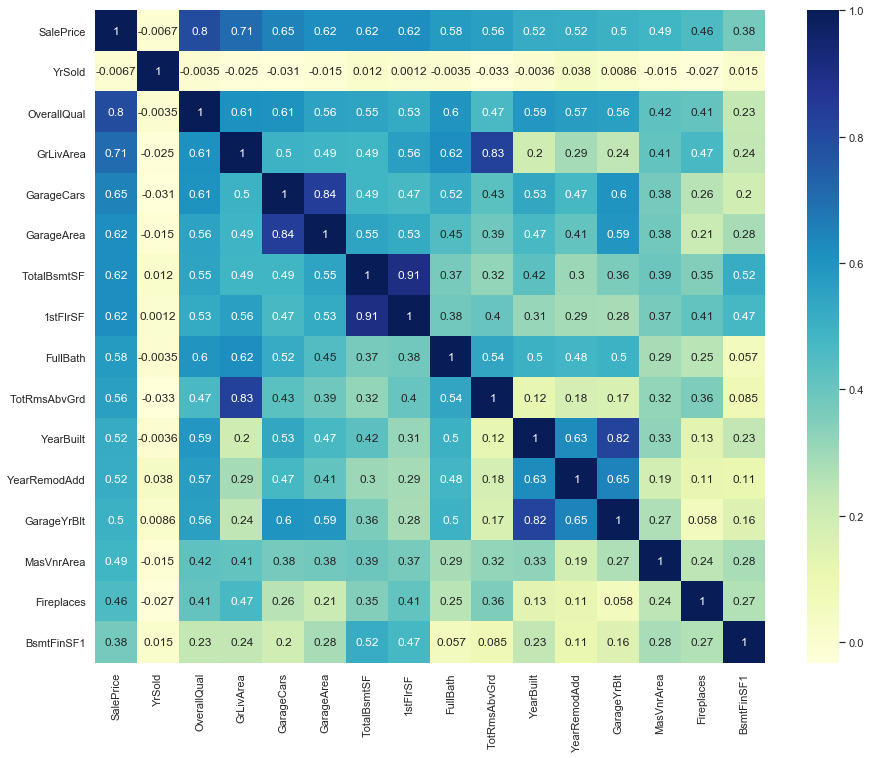

In [66]:
fig = plt.figure(figsize=(15,12))
sns.heatmap(heatmap_df.corr(), annot = True, cmap='YlGnBu')

#### Continuous variables preliminary regression analysis

#### Feature selection with RFE: scikit-learn

##### MLR #1: Sales Price = Overall Quality, Total Basement SQF, Living Area, Garage Car Amount

In [28]:
X = train[["OverallQual", "TotalBsmtSF", "GrLivArea", "GarageCars"]] #4 highest correlated variables
y = train["SalePrice"]
X = sm.add_constant(X) ## adds an intercept (beta_0) to our model

# Make the predictions by the model
model_1 = sm.OLS(y, X).fit()
predictions_1 = model_1.predict(X)

## Printing out the statistics
print("The 4 covariates are the highest correlated variables.")
print("This model accounts for 75% of the variability in sales price.")
print("Each covariate in this model is statistically significant at a p<.001 level.")
print("There is strong multicollinearity or other issues, the condition number is large.")
model_1.summary()

The 4 covariates are the highest correlated variables.
This model accounts for 75% of the variability in sales price.
Each covariate in this model is statistically significant at a p<.001 level.
There is strong multicollinearity or other issues, the condition number is large.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     833.1
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        12:48:13   Log-Likelihood:                -13179.
No. Observations:                1094   AIC:                         2.637e+04
Df Residuals:                    1089   BIC:                         2.639e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.215e+05   5858.583    -20.736      0.000   -1.33e+05    -1.1e+05
OverallQual  2.628e+04   1331.186     19.739      0.000    2.37e+04    2.89e+04
TotalBsmtSF    32.1067      3.767      8.523      0.000      24.715      39.498
GrLivArea      44.1656      3.123     14.143      0.000      38.038      50.293
GarageCars   2.195e+04   2483.929      8.837      0.000    1.71e+04    2.68e+04
==============================================================================
Omnibus:                      358.560   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28329.981
Skew:                          -0.552   Prob(JB):                         0.00
Kurtosis:                      27.905   Cond. No.                     9.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""